<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Visualización del Entrenamiento de una Red Neuronal</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Generación de Datos](#Generación-de-Datos)
* [Separación de Datos](#Separación-de-Datos)
* [Matemáticas](#Matemáticas)
* [Transformación de problemas](#Transformación-de-problemas)
* [Tecnología](#Tecnología)
* [Arquitecturas Neuronales Paradigma](#Arquitecturas-Neuronales-Paradigma)

## <span style="color:blue">Introducción</span>

Hasta este punto, sabemos los resultados de una red neuronal, pero ¿sabemos qué ocurre en el proceso de entrenamiento de manera visual?

La idea de este Notebook es generar una animación de la red neuronal mientras se entrena para mejorar la intuición del funcionamiento interno de estos modelos.

Para esto, necesitaremos:

- **Librerías de IA**
- **Librerías de Animación**

También usaremos los **widgets** de JupyterLab para mejorar la interactividad del contacto con imágenes generadas.

In [18]:
# Librería para manejo de tensores
import tensorflow as tf
# API para AI sobre motor de tensores (tensorflow)
from tensorflow import keras
# Manejo de arreglos
import numpy as np
# Manejo de DataFrames
import pandas as pd
# Dibujos matplotlib
import matplotlib.pyplot as plt
# Dibujos en seaborn
#import seaborn as sns
#Hacer Animación
from matplotlib.animation import FuncAnimation
# Escribir en gif, mp4, etc...
from matplotlib import animation
# Sacar animación en una ventana aparte
%matplotlib widget
from IPython import display

## <span style="color:blue">Generación de Datos</span>

Para este ejemplo sencillo, haremos un ejercicio de simulación.

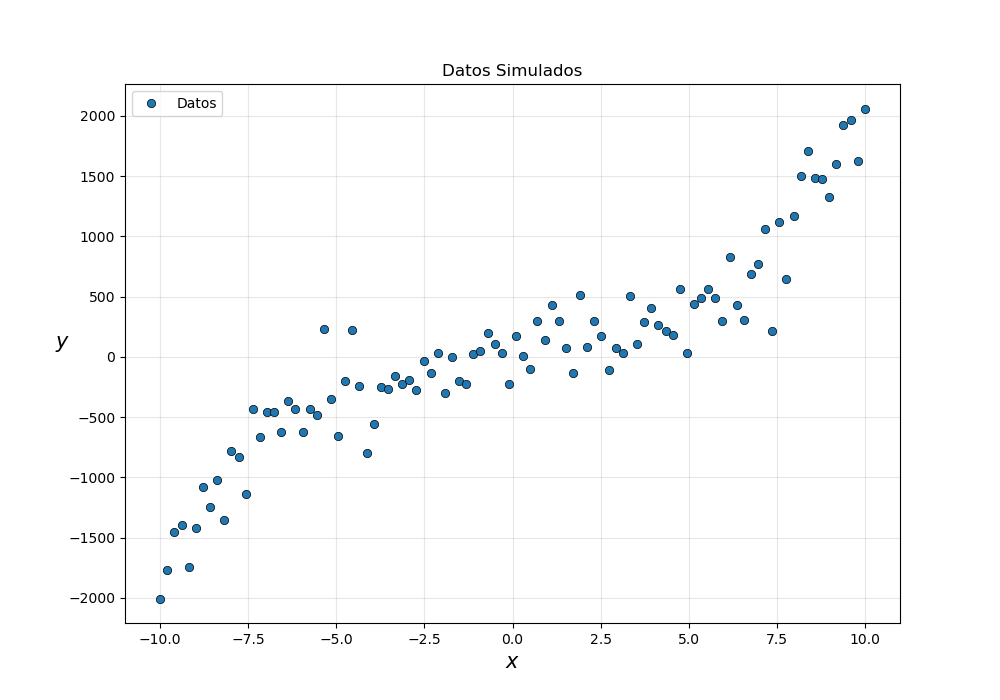

In [19]:
# Genera datos espaciados uniformemente
x=np.linspace(-10,10,100)
# Modelo generado a partir de las entradas ax^3+bx+ϵ
y=2*x**3+3*x+5*np.random.normal(0,50,size=len(x))


# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))

plt.plot(x,y,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.grid(alpha=0.3)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
plt.title('Datos Simulados')
plt.legend(['Datos']);

## <span style="color:blue">Separación de Datos</span>

Es buena práctica separar el conjunto de datos en:

- Datos de Entrenamiento
- Datos de Validación
- Datos Test

Forma de Train: (70,)
Forma de Test : (30,)


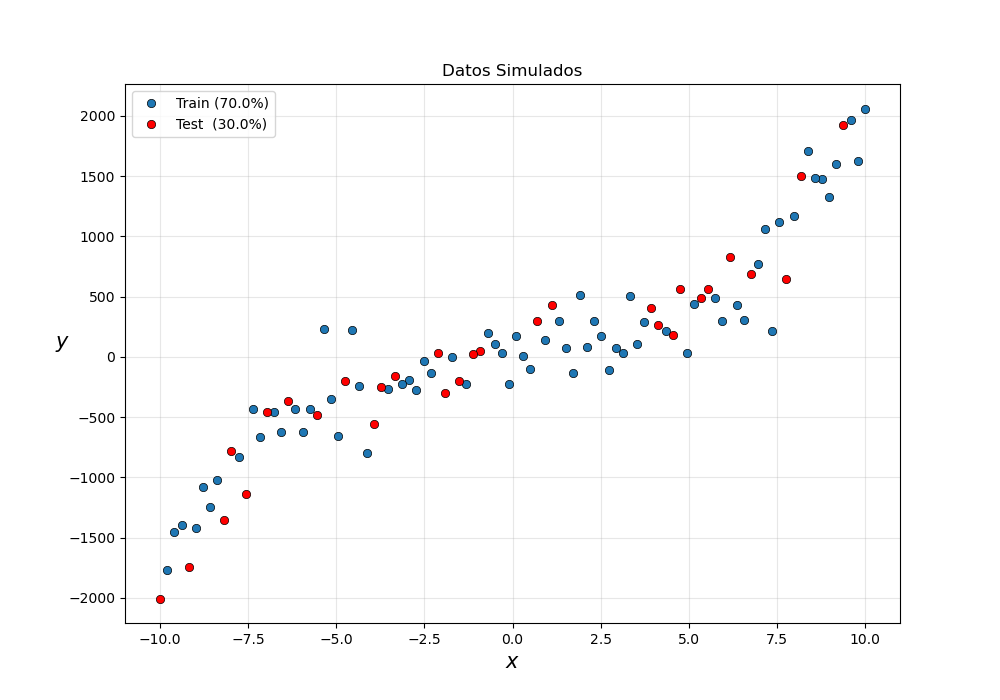

In [20]:
from sklearn.model_selection import train_test_split

# Tamaño del conjunto Test
test_size = 0.30
# Separación del Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Forma de los Datos Resultantes
print("Forma de Train:", x_train.shape)
print("Forma de Test :",x_test.shape)

# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.3)
# Dibujar train
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
# Dibujar test
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
# Leyendas
plt.legend([f'Train ({(1-test_size)*100}%)',f'Test  ({(test_size)*100}%)'])
plt.title('Datos Simulados');

## <span style="color:blue">Creación de Modelos</span>

### <span style="color:blue">Modelo sin Activaciones</span>

Para ilustrar lo lineal de un modelo simple (sin funciones de activación), miremos qué pasa cuando tenemos una red con una única neurona:

In [21]:
# Arquitectura del Modelo
model = keras.Sequential(
    # Una capa densa, 1 neurona, 1 variable de entrada
    keras.layers.Dense(units=1,input_shape=(1,))
    )

# Compilación del Modelo usando optimizador y pérdida
model.compile(optimizer='sgd', loss='mean_squared_error')
# Resumen del Modelo (Parámetros, etc)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
n_iter=100

predecir=np.zeros((n_iter+1,len(x_train)))

predecir[0,:]=model.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    # Entrenar 1 epoch
    model.fit(x_train, y_train, epochs=1,verbose=1,validation_split=0.1)
    # Predecir puntos en ese estado
    predecir[i+1,:]=model.predict(sorted(x_train)).reshape(1,-1)

1/2 [==============>...............] - ETA: 0s - loss: 836249.3750

2022-07-28 17:05:37.198967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-28 17:05:37.336179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 28ms/step - loss: 122268.6797 - val_loss: 95236.0156


2022-07-28 17:05:37.435532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 1ms/step


In [23]:
def animate(i):
    if i<n_iter:
        line.set_ydata(predecir[i,:])

In [31]:
fig = plt.figure(figsize=(12,5))


axes = fig.add_subplot(1,2,1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5,alpha=0.3)

line, = axes.plot(sorted(x_train), predecir[0,:], 'g-')

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Visualizando Red Neuronal');

# Animación
ani = FuncAnimation(fig=fig, func=animate, interval=100)

# Visualización de Modelo para Datos Test
axes2 = fig.add_subplot(1,2,2)
predecir_test = model.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5,alpha=0.1)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(sorted(x_test),predecir_test,'g-',scaley=True, scalex=True)

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Entrenado para Test');

# Video para renderizar
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()

### <span style="color:blue">Modelo con Activaciones y Profundidad</span>

In [32]:
model2 = tf.keras.Sequential([
    # 4 Capas densas con función de activación
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1)
    ])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 10        
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [33]:
n_iter=100

predecir2=np.zeros((n_iter+1,len(x_train)))
predecir2[0,:]=model2.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    model2.fit(x_train, y_train, epochs=30,verbose=1,validation_split=0.1)
    predecir2[i+1,:]=model2.predict(sorted(x_train)).reshape(1,-1)

2022-07-28 17:13:12.712440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 46ms/step
Epoch 1/30


2022-07-28 17:13:13.370455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 355ms/step - loss: 678184.9375 - val_loss: 455384.3750
Epoch 2/30
2/2 [==============================] - 0s 20ms/step - loss: 678050.9375 - val_loss: 455290.8750
Epoch 3/30
2/2 [==============================] - 0s 26ms/step - loss: 677919.1250 - val_loss: 455198.6562
Epoch 4/30
2/2 [==============================] - 0s 26ms/step - loss: 677809.8125 - val_loss: 455107.3438
Epoch 5/30


2022-07-28 17:13:14.672764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step - loss: 677670.6250 - val_loss: 455015.1562
Epoch 6/30
2/2 [==============================] - 0s 25ms/step - loss: 677541.6250 - val_loss: 454922.5625
Epoch 7/30
2/2 [==============================] - 0s 24ms/step - loss: 677406.6875 - val_loss: 454827.5938
Epoch 8/30
2/2 [==============================] - 0s 20ms/step - loss: 677282.6875 - val_loss: 454730.8438
Epoch 9/30
2/2 [==============================] - 0s 19ms/step - loss: 677150.1250 - val_loss: 454632.8750
Epoch 10/30
2/2 [==============================] - 0s 20ms/step - loss: 676999.0000 - val_loss: 454533.2812
Epoch 11/30
2/2 [==============================] - 0s 20ms/step - loss: 676862.3750 - val_loss: 454430.9375
Epoch 12/30
2/2 [==============================] - 0s 19ms/step - loss: 676723.1875 - val_loss: 454325.3125
Epoch 13/30
2/2 [==============================] - 0s 19ms/step - loss: 676580.3750 - val_loss: 454216.1250
Epoch 14/30
2/2 [===========================

In [34]:
def animate2(i):
    if i<n_iter:
        line.set_ydata(predecir2[i,:])

In [72]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,2,1)

plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5,alpha=0.3)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

line, = axes.plot(sorted(x_train), predecir2[0,:], 'g-')

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Visualizando Red Neuronal');

# Animación
ani2 = FuncAnimation(fig=fig, func=animate2, interval=150)

axes2 = fig.add_subplot(1,2,2)

predecir2_test = model2.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5,alpha=0.1)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(sorted(x_test),predecir2_test,'g-')

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Resultante para Test');

video = ani2.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

### <span style="color:blue">Datos más Retadores</span>

In [3]:
trend=0.1
time=np.arange(0,100,0.1)
value=trend*time+np.sin(time)+np.random.normal(scale=0.5,size=len(time))

In [26]:
model3 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(1,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=30,activation='elu'),
    keras.layers.Dense(units=40,activation='elu'),
    keras.layers.Dense(units=50,activation='elu'),
    keras.layers.Dense(units=60,activation='elu'),
    keras.layers.Dense(units=70,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model3.compile(optimizer='adam', loss='mean_squared_error')
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 20)                220       
                                                                 
 dense_20 (Dense)            (None, 30)                630       
                                                                 
 dense_21 (Dense)            (None, 40)                1240      
                                                                 
 dense_22 (Dense)            (None, 50)                2050      
                                                                 
 dense_23 (Dense)            (None, 60)                3060      
                                                                 
 dense_24 (Dense)            (None, 70)               

In [ ]:
def animate3(i):
    if i<n_iter:
        line.set_ydata(predecir3[i,:])

In [18]:
n_iter=100

predecir3=np.zeros((n_iter,len(time)))

for i in range(n_iter):
    model3.fit(time, value, epochs=10,verbose=1)
    predecir3[i,:]=model3.predict(time).reshape(1,-1)

Epoch 1/10
 4/32 [==>...........................] - ETA: 0s - loss: 31.5720 

2022-07-01 16:47:15.118843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 17ms/step - loss: 7.9993
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 1.0676
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7682
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7404
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7436
Epoch 6/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7396
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7756
Epoch 8/10
32/32 [==============================] - 0s 15ms/step - loss: 0.7348
Epoch 9/10
32/32 [==============================] - 0s 15ms/step - loss: 0.7342
Epoch 10/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7387


2022-07-01 16:47:19.992681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7405
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7294
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7376
Epoch 4/10
32/32 [==============================] - 0s 15ms/step - loss: 0.7523
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.7460
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 0.7751
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.7630
Epoch 8/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7447
Epoch 9/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7297
Epoch 10/10
32/32 [==============================] - 0s 14ms/step - loss: 0.8075
Epoch 1/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7533
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.7607
Epoch 3/10
32/32 [=====================

In [21]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,1,1)

plt.plot(time,value,'b-',scaley=True, scalex=True)

line, = axes.plot(time, predecir3[0,:], 'r-')

ani3 = FuncAnimation(fig=fig, func=animate3, interval=200)

video = ani3.to_html5_video(embed_li)
html = display.HTML(video)
display.display(html)
plt.close()         

### <span style="color:blue">Visualizaciones en 2D</span>

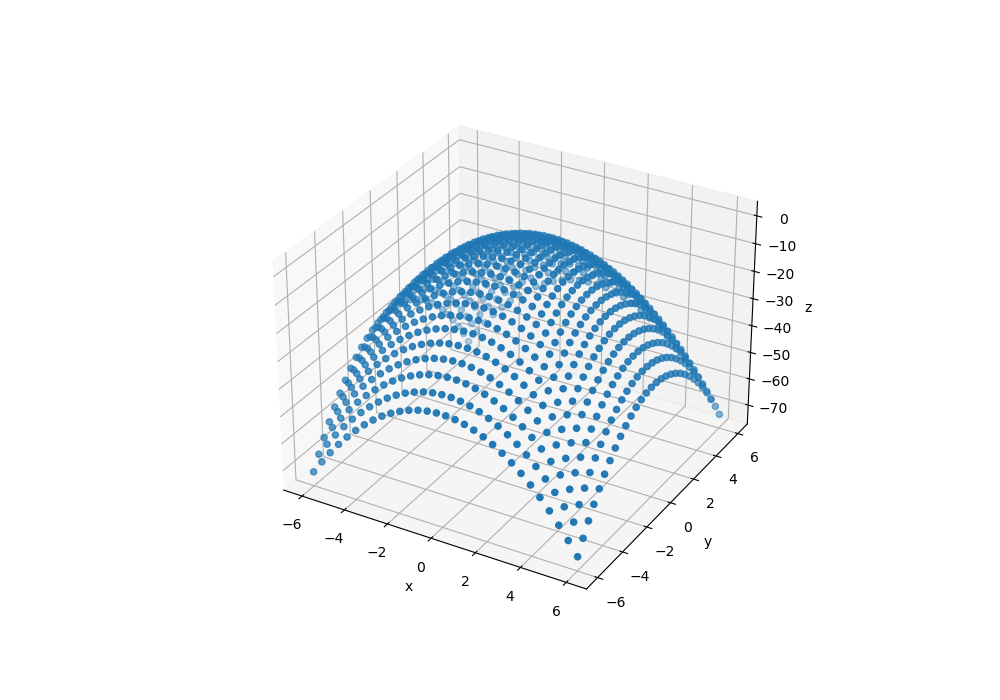

In [51]:
from mpl_toolkits.mplot3d import Axes3D

# Generar Datos

def f(x, y):
    return -(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.close('all')

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [52]:
data = np.array([X, Y, Z]).reshape(3, -1).T
df_data = pd.DataFrame(data,columns=['x','y','z'])
df_data

,x,y,z
0,-6.000000,-6.0,-72.000000
1,-5.586207,-6.0,-67.205707
2,-5.172414,-6.0,-62.753864
3,-4.758621,-6.0,-58.644471
4,-4.344828,-6.0,-54.877527
...,...,...,...
895,4.344828,6.0,-54.877527
896,4.758621,6.0,-58.644471
897,5.172414,6.0,-62.753864
898,5.586207,6.0,-67.205707


In [53]:
model4 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(2,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model4.compile(optimizer='adam', loss='mean_squared_error')
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 20)                220       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [54]:
n_iter=150

predecir4=np.zeros((n_iter+1,len(df_data['z'])))
predecir4[0,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

for i in range(n_iter):
    model4.fit(df_data[['x','y']].values, df_data['z'].values, epochs=1,verbose=1)
    predecir4[i+1,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

29/29 [==============================] - 0s 3ms/step


2022-07-28 17:23:14.621450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/29 [=================>............] - ETA: 0s - loss: 877.5788

2022-07-28 17:23:14.857299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 0s 2ms/step


In [65]:
def animate4(i):
    if i<n_iter:
        ax.clear()
        ax.set_zlim(-70,10)
        ax.scatter3D(X, Y, Z)
        ax.plot_surface(X,Y,predecir4_grid[i,:,:],cmap='jet',shade=True,alpha=0.8)

In [66]:
predecir4_grid = predecir4.reshape(n_iter+1,X.shape[0],X.shape[1])
predecir4_grid.shape

(151, 30, 30)

In [78]:
plt.close('all')
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.set_zlim(-70,10)
#ax.view_init(65, 35)
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot_surface(X,Y,predecir4_grid[0,:,:],cmap='jet',shade=True,alpha=0.8)


ani4 = FuncAnimation(fig=fig, func=animate4, interval=150)

video = ani4.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()